In [1]:
import numpy as np
import matplotlib.pyplot as plt

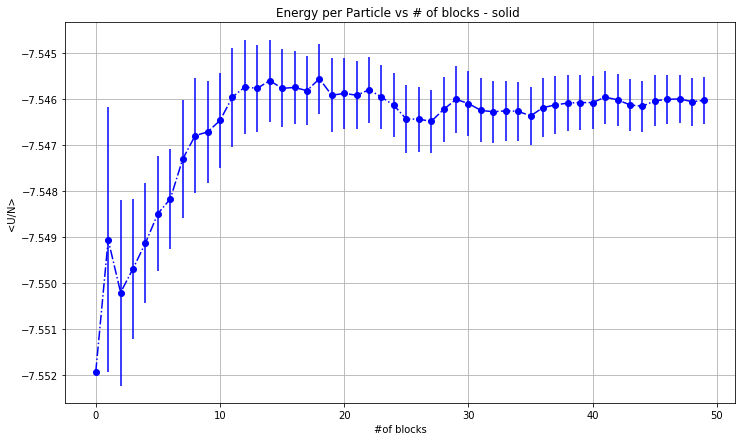

In [48]:
load_ene = np.loadtxt('solid/output.epot.0')
ene = []
err = []
for i in range(len(load_ene)):
    ene.append(load_ene[i][2])
    err.append(load_ene[i][3])
ene = np.asarray(ene)
err = np.asarray(err)

x = range(len(load_ene))

fig = plt.figure(figsize = (12,7))

ax_1 = fig.add_subplot(111)
ax_1.errorbar(x,ene,yerr = err,fmt = 'bo-.')
ax_1.grid()
ax_1.set_title("Energy per Particle vs # of blocks - solid ")
ax_1.set_xlabel("#of blocks")
ax_1.set_ylabel("<U/N>")

plt.show()

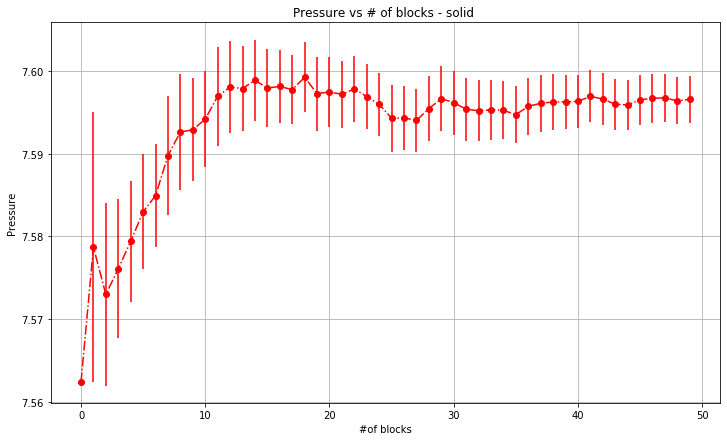

In [49]:
load_press = np.loadtxt('solid/output.pres.0')
press = []
err = []
for i in range(len(load_press)):
    press.append(load_press[i][2])
    err.append(load_press[i][3])
press = np.asarray(press)
err = np.asarray(err)

x = range(len(load_press))

fig = plt.figure(figsize = (12,7))

ax_1 = fig.add_subplot(111)
ax_1.errorbar(x,press,yerr = err,xerr = None,fmt='ro-.')
ax_1.grid()
ax_1.set_title("Pressure vs # of blocks - solid ")
ax_1.set_xlabel("#of blocks")
ax_1.set_ylabel("Pressure")

plt.show()

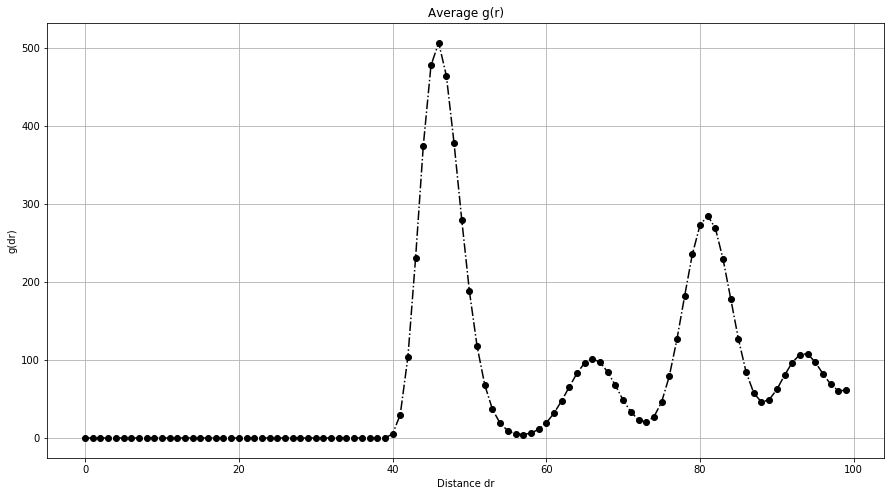

In [47]:
g_ave = np.loadtxt('solid/output.gave.0')
x = np.arange(100)
#g_err = np.loadtxt('liquid/output.gave_err.0')

fig = plt.figure(figsize=(15,8))
ax_1 = fig.add_subplot(111)
ax_1.plot(x,g_ave,'ko-.')
ax_1.set_title('Average g(r)')
ax_1.set_xlabel('Distance dr')
ax_1.set_ylabel('g(dr)')
ax_1.grid()
plt.show()

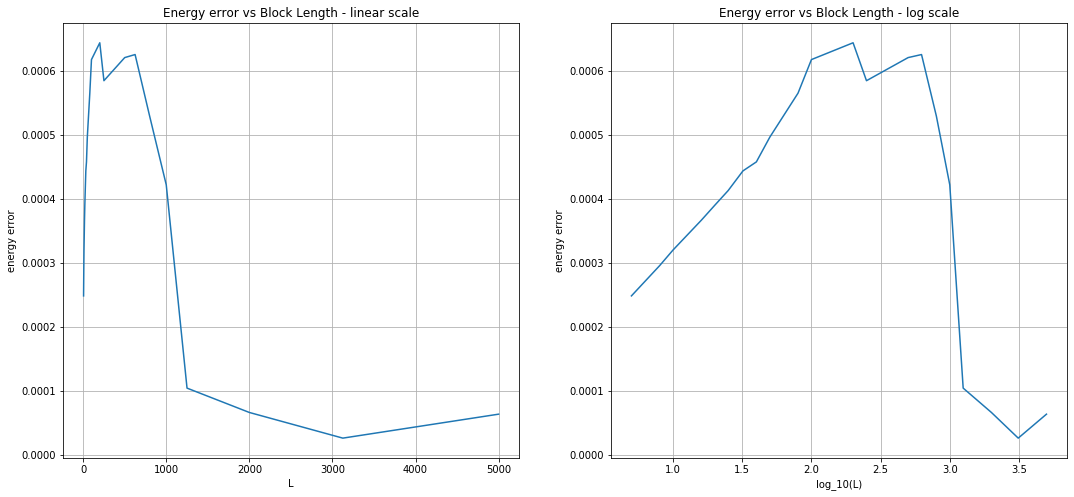

In [5]:
ene = np.loadtxt('solid/energy.out')
press = np.loadtxt('solid/pressure.out')

N= len(ene) #should be 5*10^5

Lengths=[5,8,10,16,20,25,32,40,50,80,100,200,250,500,625,800,1000,1250,2000,3125,5000]  #some divisors of 5*10^5

Yplot = []

for L in Lengths:
    M= int(N/L)    #number of blocks
    ave=np.zeros(M)
    ave2=np.zeros(M)
    glob_ave=0
    glob_ave2=0
    for iblk in range(M):  #cycle blocks
        for istep in range(L):    #compute average in single block
            ave[iblk]+= ene[iblk+istep]
        ave[iblk]/= L
        ave2[iblk] = ave[iblk]**2
        glob_ave+=ave[iblk]     #build up average of whole sample, given a blk length
        glob_ave2+=ave2[iblk]
    sigma2 = glob_ave2/M - (glob_ave/M)**2
    error = np.sqrt(sigma2 / M)
    
    Yplot.append(error) #build up vector to plot


    
fig = plt.figure(figsize=(18,8))    

ax1 = fig.add_subplot(121)
ax1.plot(Lengths,Yplot)
ax1.set_title("Energy error vs Block Length - linear scale")
ax1.set_xlabel("L")
ax1.set_ylabel("energy error")
ax1.grid()

#log_10 scale on x

log_len = np.log10(np.asarray(Lengths))

ax2 = fig.add_subplot(122)
ax2.plot(log_len,Yplot)
ax2.set_title("Energy error vs Block Length - log scale")
ax2.set_xlabel("log_10(L)")
ax2.set_ylabel("energy error")
ax2.grid()
plt.show()